## General UEDGE things
Plotting 2D and dimensions
Downloading/installing/building
Recommend using pyenvs and pyenv-virtualvenvs

Display use of:
- nx, ny
- Case.get
- shape
- about
- search
- searchvarname

- ixpt1
- ixpt2
- iysptrx

- Structure of ion arrays
- Structure of gaseous arrays

- Node structure

- Save variables
- Populating (UEDGE and Case.populate)

- Saving and restoring
- Tracking changes to inputs

- Defining YAML variables to be saved



# Getting started with the UEDGE Toolbox

Welcome to the introduction of UETOOLS, short for the UEDGE Toolbox. The classes provided by UETOOLS interact with UEDGE on a fundamental level, and aims to provide the user with powerful tools to for running and processing UEDGE simulations. This guide will take you through the basics of UETOOLS. Some aspects of UEDGE functionality, important for understanding the functionality of the UETOOLS, will be presented briefly here, but more in-depth discussion of UEDGE itself is reserved for the UEDGE documentation itself. 

## TOC:
* [Installing UETOOLS](#installing-uetools)
* [Installing UEDGE](#installing-UEDGE)
* [Structure of UETOOLS](#structure)

## Installing UETOOLS<a class="anchor" id="installing-uetools"></a>
Presently, UETOOLS can be installed by cloning the [UETOOLS GitHub repository](https://www.github.com/llnl/uetools) and including the location of UETOOLS in your \$PATH variable. More install options are coming shortly.

## Installing UEDGE<a class="anchor" id="installing-uedge"></a>
UEDGE is a prerequisite for UETOOLS. Since UEDGE can be installed by pip, or built locally, it is not, however, a forced prerequisite for installing UETOOLS. E.g. the user will need to ensure a functioning version of UEDGE is available to the Python command prompt. The most straightforward way to install UEDGE is using pip install
    pip install uedge
For more information on installing UEDGE, consult the UEDGE manual.

## Structure of UETOOLS<a class="anchor" id="structure"></a>
UETOOLS provides the user with two primary classes for interacting with UEDGE case: the Case and Database classes. These are presented shhortly below.

### The Case Class
Case is the primary class in UETOOLS, and handles most of the setup of a UEDGE case, and provides an interface for creating YAML input files for UEDGE. The base Case class inherits methods from several classes, making it very modular and easy to patch to the individual user needs. The Case class itself primarily handles the exchange of information with UEDGE, such as changing or getting variable values, setting up a case based on the input file, and restoring saved solutions. Here follows a short description of the most commonly used classes, which Case inherits:

- Caseplot: handles specific plotting, using the high-level plotting functions avilable in the Plot class.
- Save: handles saving of data to UETOOLS save-files, compatible the with UEDGE restore function. The UETOOLS save-files also store additional data, such as grid data, and some commonly used derived variables. Thus, UETOOLS can restore UEDGE cases from save-files only, removing the need for separate input and grid files. Additionally, the saves can be used as data dumps as discussed later.
- Solver: provides aliases for the UEDGE solvers through the Case class
- PostProcessors: contains a number of vetted and approved post-processors for numerous UEDGE quantities

### The Database Class
Because only a single instance of UEDGE can be run in a Python prompt, UETOOLS provides a database class that can statically read data from UETOOLS save-files and compile them to databases that can be scanned/compared. Using a single Python prompt to restore many UEDGE cases in succession is to be avoided, as there may be issues with the grid sizes, or different setups can make modifications to variables which are not reset in subsequent files, making the results order-dependent. The database instead creates static UETOOLS Case objects that are stored in array, allowing data to be accessed for all cases stored, simultaneously.

The use of databases is discussed in greater detail below.

## Running UETOOLS for the first time
When creating a Case object, UETOOLS checks whether a configuration file for UETOOLS is present. If no configuration file is present, a message is raised:

In [1]:
from uetools import Case
c=Case()

No UETOOLS config file found: Configure file by calling Case.CreateConfig()
Alternatively, manually create the .uetoolsrc configuration YAML in your home directory.


The configuration file can be created using UETOOLS:

In [15]:
c.CreateConfig()

UEDGE config file not found!
Create it at /Users/holm10? [y/n]


 y


Define path to "aphdir":


 ~/Documents/fusion/uedge/rates/aph


    Path defined successfully!
Define path to "apidir":


 ~/Documents/fusion/uedge/rates/api


    Path defined successfully!
UEDGE config file /Users/holm10.uetoolsrc successfully created!


Alternativelly, the configuration file can be written manually into your home directory. If you would like to use UETOOLS without a configuration file, you can supress the startup message by creating an empty .uetoolsrc-file in your home directory.

# Using Case Objects<a class="anchor" id="using-case"></a>
Here, we will highlight some of the usefule features of case objects, starting from restoring and plotting data, to running parameter scans.

## Restoring a UEDGE case<a class="anchor" id="restoring"></a>
The first thing to do, is to restore a UEDGE case. Here, we will look at a few different ways of doing so.

### Restoring a UEDGE case from an input file
UETOOLS can restore UEDGE cases from YAML input files. To do this, you need to have a case set up for usage with an input file. Such an example has been provided as part of the notebook. More information on setting up a YAML input file and UEDGE cases in general, can be found under the relevant sections of the UETOOLS and UEDGE manuals, respectively. 

Now, let's navigate to the folder containing a UEDGE example case and restore the UEDGE case:

In [1]:
# Navigate to the example folder
from os import chdir
chdir('testcase_hires')
# Restore the case
from uetools import Case
c = Case('input.yaml') # Create a test at variable "c" from the YAML input file

UEDGE configuration file /Users/holm10/.uetoolsrc read.
Saved solution successfully restored from nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 9.19e-03



As UETOOLS restores the case from the YAML file, it also checks whether the case is converged. As is evident from the output this example case is converged. The convergence check is done without precoditioning to quickly populate the UEDGE variables based on the case setup and the saved state. The same population of the variables and check for convergence can be done manually at any point, using Case.populate:

In [2]:
c.populate()


*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 9.19e-03



### Restoring a UEDGE case from a save file
Alternatively, UETOOL Case objects can also be restored from save-files, without the need of separate input or grid files, as discussed above. In order to create a Case object from a UETOOLS save-file, create a Case with the save-file path as argument:

In [3]:
c = Case('nc20.hdf5')

UEDGE configuration file /Users/holm10/.uetoolsrc read.
Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from nc20.hdf5
  User-specified diffusivities read from HDF5 file
Saved solution successfully restored from nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 9.19e-03



As is evident from the above, restoring from a save-file is equivalent to restoring a save from an input file when using UETOOLS. Therefore, UEDGE cases can be transferred in a single file (barring any atomic and molecular rates, which are used when setting up the case).

### Creating a Case object from memory
In certain situations, it might be necessary to create a Case object without using either a YAML input or UETOOLS save-file, e.g. when the case only has a Python script \*.py input file available. Under such circumstances, restore the case as one would normally do and, then, create a Case object wihtout any input arguments. This option creates a Case object reading all data from memory, and can be used for converging/analyzing the data:

In [4]:
# <INITIALIZE THE CASE FIRST>
c = Case()
# Ensure the case is converged
c.populate()

UEDGE configuration file /Users/holm10/.uetoolsrc read.

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 9.19e-03



### Static Case objects
Static case objects are Case objects that do not interact with UEDGE but, rather, read data from a file created by UETOOLS, such as a save file. The save file contains a number of commonly-used arrays (see Case Options for more details), which can be accessed using UETOOLS without running UEDGE. Such Case objects are 'read-only', but very useful for accessing results of UEDGE quickly and effortlessly:

In [18]:
c_static = Case('nc20.hdf5', inplace=True)

UEDGE configuration file /Users/holm10/.uetoolsrc read.


### Case options
When creating a case, there are a few keyword options available to the user, which might be useful:
- inplace [=False]: When set to True, a Case is created contining only the UEDGE data in the file defined. This option is icompatible with reading YAML input files, and require specifying a data file of HDF5 type, created by UETOOLS (such as a save file).
- variableyamlfile [=None]: Path to manually defined YAML file, defining additional data to be read/written to save files by UETOOLS. By default, uses the defaultvariables.yaml in UETOOLS/yamls
- verbose [=True]: Setting to False supresses output of Case objects

## Managing data using Case objects<a class="anchor" id="managing-data"></a>
Here, managing UEDGE data using Case objects will be shortly discussed, assuming the case is run in a UEDGE session (e.g. inplace=False was used during the creation of the case). 

### Case.populate
As already mentioned, Case.populate fills two functions:
1. Populates all arrays in UEDGE based on the setup provided and the saved state
2. Assesses whether the case is at steady-state or not 

In [6]:
c.populate()


*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 9.19e-03



### Case.get
The Case.get method is used to access UEDGE data or, in the case of inplace=True, data from a file. One advantage of Case.get over directly accessing the UEDGE variables, is that no knowlege of the packages each variable is defined in is necessary, contrary to directly accessing them from UEDGE. However, the usage of Case.get is equivalent to directly accessing variables from UEDGE when run in interactive mode:

In [26]:
print("Interactive ngsp: ", c.get('ngsp'))
print("Static ngsp: ", c_static.get('ngsp'))
# Import UEDGE packages to prompt 
from uedge import *
print("UEDGE-accessed ngsp:", com.ngsp)

Interactive ngsp:  2
Static ngsp:  2
UEDGE-accessed ngsp: 2


### Case.setue
The Case.setue method can be used to the value of UEDGE variables. Naturally, this function is disabled for static Case objects. Again, the standard UEDGE variables can be used instead of using Case.setue:

In [41]:
c.setue("ngsp", 3)
print("ngsp after being set to 3 by setue:", com.ngsp)
com.ngsp = 2
print("ngsp after being set natively in UEDGE:",com.ngsp)
c_static.setue("ngsp", 3)

ngsp after being set to 3 by setue: 3
ngsp after being set natively in UEDGE: 2


Exception: Cannot set/get UEDGE values when reading from HDF5 file

**NOTE:** Changes made to the UEDGE variables are only transferred to the Case object after a time-step has been taken in UEDGE, executing the changes (either using Case.populate or exmain). Consequently, Case.get will return the old values until Case.populate or and exmain has been executed.

### Case.assign
The Case method uses mutex (mutually exclusive) checks to manage the shared UEDGE memory. This means, only one case interactive object can be active at any single time. Consequently, when a more than one Case object is created in the same Python session is created, only one can be used at a time:

In [45]:
c2 = Case("input.yaml")
c.get("ngsp")

UEDGE configuration file /Users/holm10/.uetoolsrc read.
Saved solution successfully restored from nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 9.19e-03

Mutex error! Object run-ID is 3, UEDGE run-ID is 6. Aborting.


Exception: Case doesn't own UEDGE memory

In order to return control to another Case object, the assign function can be used:

In [49]:
c.assign()
print("ngsp in Case object 'c': ", c.get("ngsp"))

ngsp in Case object 'c':  2


**NOTE:** When switching between cases there may be switches set in one case, but not in the other, which subsequently remain unset. Thus, using several cases in the same session is to be avoided, as they may be order-dependent. If several cases with different input files must be used within the same session, use Case.populate regularly to assure the settings of the case you are working with has not changed:

In [50]:
c.populate()


*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 9.19e-03



## Time stepping in UEDGE using UETOOLS <a class="anchor" id="time-stepping"></a>
A time-step in UEDGE is taken by executing the exmain-function, located in bbb. In UETOOLS, there is a Case wrapper for the function, equivalent to executing the function from UEDGE. 

- Restore variable, saving new state

#### Case.about
#### Case.search
#### Case.searchvarname
#### Case.exmain
## UEDGE dimensions and arrays
## The UEDGE grid
### The X-point cut
## Case.about_uedge_setup



## Basic plotting using UETOOLS<a class="anchor" id="plotting"></a>
UETOOLS contains a wide array plotting tools for visualizing UEDGE results. Here, we will showcase some of the most central routines.

#### Plotting the grid
The grid function has a number of options that can be utilized to alter the style of the grid:

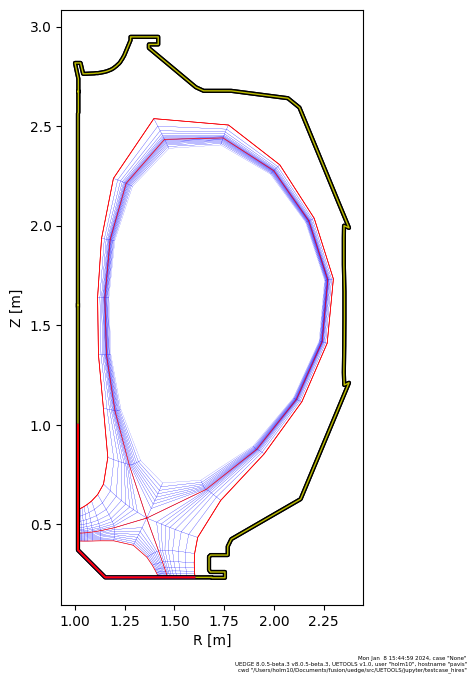

In [28]:
c.grid(linewidth=0.1, 
       vessel=True, 
       plates=True, 
       platecolor=['gold','teal'], 
       lcfs=True, 
       lcfscolor='r', 
       linecolor='b'
      );

#### Plotting colored meshes
Meshplots have a number of controls, in addition to those available to the grid function. Let's start by plotting the electron density.

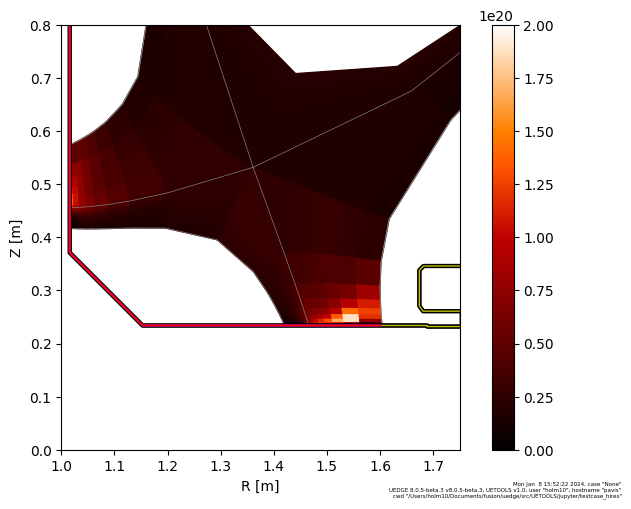

In [30]:
c.plotmesh(
    c.get('ne'), 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    figsize=(7,5), 
    zrange=(0,2e20), 
    cmap='gist_heat'
);

Here, the Case-method 'get' is used to retrieve the electron density data from variable 'ne' of the 'bbb' package. The get command is directly interchangeable with the variable, e.g. 'bbb.ne'.

The heatmap can also be plotted on a logartihmic axis:

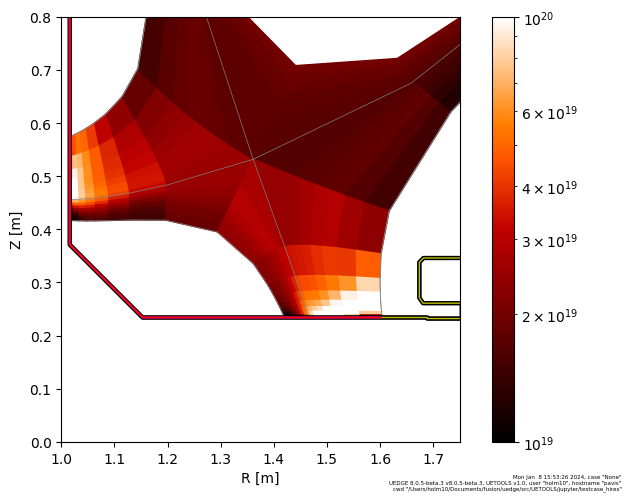

In [32]:
c.plotmesh(
    bbb.ne, 
    log=True, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    figsize=(7,5), 
    zrange=(1e19,1e20), 
    cmap='gist_heat'
);

When running an interactive session, the function variablemesh can be used to produce an interactive figure (not available in Jupyter notebooks).

In [51]:
c.variablemesh(
    bbb.ne,
    log=True, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    figsize=(7,5), 
    zrange=(1e19,1e20), 
    cmap='gist_heat'
);

/Users/holm10/Documents/fusion/uedge/src/uetools/uetools/UeCase/CasePlot.py:301: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


UETOOLS makes a number of pre-defined mesh plots available to the user, where all plotmesh-options are available to the user:
- ne2D
- te2D
- ni2D
- ti2D
- ng2D
- tg2D

Each of the above listed function can be supplied with the argument True to produce an interactive plot (e.g. ne2D(True), which is equivalent to ne2D(interactive=True).

#### Contour plots
Here is shown an examples of plotting a contour of the electron temperature:

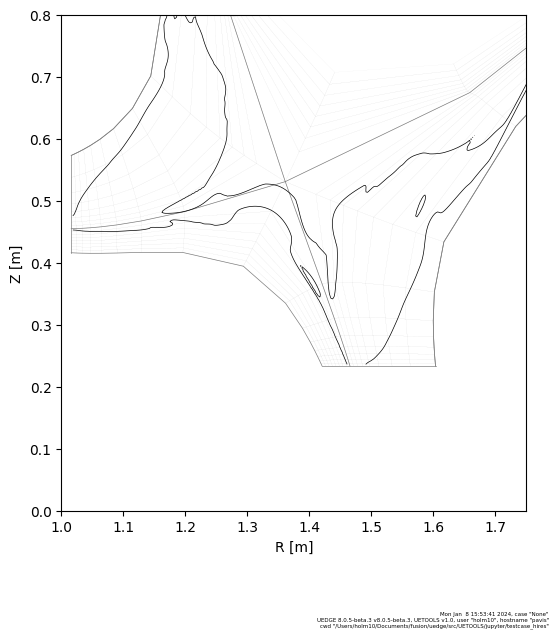

In [34]:
c.contour(
    c.get('te')/c.get('ev'), 
    levels=[10,50], 
    labels=False, 
    xlim=(1, 1.75), 
    ylim=(0,0.8)
);

Here, Te has to be divided by the unit charge, since UEDGE evaluates the energy equation in Joules rather than eV.

The 'levels' argument specifies the value of the levels to be plotted or, in the case of a single int, the number of levels. In order to better distinguish the levels, they can be plotted sucessively with different line styles:

In [12]:
f=c.contour(
    c.get('te')/c.get('ev'), 
    levels=[10], 
    labels=False, 
    xlim=(1, 1.75), 
    ylim=(0,0.8)
);
c.contour(
    c.get('te')/c.get('ev'), 
    levels=[50], 
    labels=False, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    ax=f, 
    linestyles='--', 
    color='r');

#### Visualizing flows using quiver plots
When visualizing flows or velocities, quiver-plots are useful tools available in UETOOLS:

In [13]:
c.quiver(
    c.get('fngx')[:,:,0], 
    c.get('fngy')[:,:,0], 
    uniformsize=True, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    alpha=False
);

Here, the function expects 2D arrays with dimensions (nx, ny). However, the displayed gaseous flows have a third index, corresponding to the gaseous species: thus, the arrays have been sliced to be compatible with the plotting routine. The same applies for all 2D plotting routines.

#### Plotting streamlines
Sometimes, it might be more convenient to analyze flows in terms of streamlines:


In [14]:
c.streamline(
    c.get('fnix')[:,:,0], 
    c.get('fniy')[:,:,0], 
    linewidth=0.3, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    density=1.5
);

#### Plotting target profiles
UETOOLS provides a number of shorthand functions for plotting inner and outer target profiles quickly and conveniently:

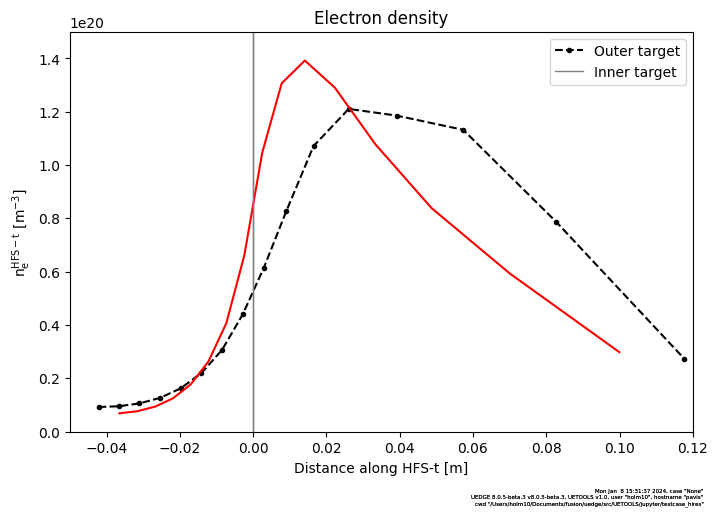

In [15]:
ne_t = c.neOT(
    color='k', 
    linestyle='--', 
    marker='.'
)
c.neIT(
    color='r', 
    ax = ne_t, 
    xlim=(-0.05,0.12), 
    ylim=(0,1.5e20), 
    title='Electron density', 
    logx=False, 
    logy=False
)
ne_t.get_axes()[0].legend(["Outer target", "Inner target"]);

Additional inner/outer profiles available
- neOT
- niOT
- ngOT
- teOT
- tiOT

And corresponding profiles for inner targets. When plotting multi-species parameters, the script plots all species simultaneously by default, so the index must be specified manually:


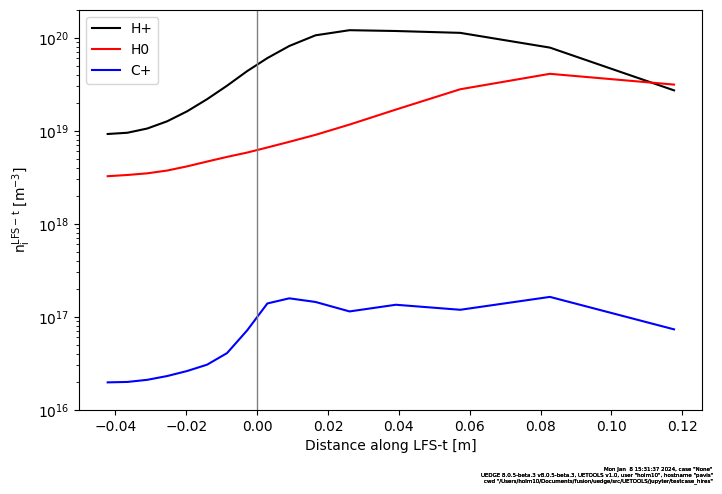

In [16]:
ni_ot = c.niOT(
    0, 
    logy=True, 
    marksep=False, 
    ylim=(1e16,2e20)
)
c.niOT(
    1, 
    ax=ni_ot, 
    color='r', 
    logy=True, 
    marksep=False, 
    ylim=(1e16,2e20)
);
c.niOT(
    2, 
    ax=ni_ot, 
    color='b', 
    logy=True, 
    ylim=(1e16,2e20)
);
ni_ot.get_axes()[0].legend(['H+','H0', 'C+']);

# 

# 